<a href="https://colab.research.google.com/github/rajput97sim/almabetter_project/blob/main/AirbnbEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size='10'>**Project Name - AirBnb Bookings Analysis**</font>
<br>Project Type - Exploratory Data Analysis
<br>Contribution - Individual
<br>Created by - Simran Rajput



<font size='10'>**Introduction**</font>

<font size='3'>Since its inception in 2008, Airbnb has revolutionized the way people travel and has ushered in a new era of personalized and unique travel experiences. Today, Airbnb stands as a global phenomenon, offering travelers a one-of-a-kind service that has transformed the way people explore the world. At the heart of Airbnb's success lies its vast database of listings, which spans millions of unique accommodations worldwide. This treasure trove of data is not merely a collection of numbers and statistics; it is a valuable resource that underpins critical aspects of the company's operations.

With millions of listings, Airbnb generates an immense volume of data, and the analysis of this data plays a pivotal role in shaping the company's strategies and decision-making processes. The dataset encompasses an impressive 49,000 observations, featuring 16 columns that encompass a diverse range of data types, from categorical to numeric.</font>

<font size='8'>**Business Objective**<br>
<font size='3'>1.What are the most common types of properties listed by hosts on Airbnb ?<br>
2.Among all the neighborhoods, which specific neighborhoods or areas attract the highest number of bookings and guest interest?<br>
3.Where are the areas with the maximum traffic? How can we strategically leverage these areas for business growth and expansion?<br>
4.What is the ideal pricing range for different room types and locations that align with customer preferences and market demand?<br>
5.Who are the hosts whose properties receive the most reviews and positive ratings from guests? How can we provide extra benefits to these top-performing hosts to support their growth and enhance the overall Airbnb experience?<br>

<font size='8'>**General Guidelines : -**<br>
<font size='3'>Well-structured, formatted, and commented code is required.

Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

The additional credits will have advantages over other students during Star Student selection.

    [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
              without a single error logged. ]

Each and every logic should have proper comments.

You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.

# Chart visualization code
Why did you pick the specific chart?
What is/are the insight(s) found from the chart?
Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

You have to create at least 20 logical & meaningful charts having important insights.
[ Hints : - Do the Vizualization in a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis ]
</font>

<font size='8'>**Import libraries**</font>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<font size='5'>Dataset Loading</font>

In [ ]:
#Load Dataset
df=pd.read_csv('/content/drive/MyDrive/Data/Airbnb NYC 2019.csv')

<font size='8'>**Dataset First View**</font>

In [ ]:
#Dataset first view
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#columns in dataset
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

<font size='8'> **Information about dataset**</font>

In [ ]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

<font size='5'>Dataset Description</font>

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<font size='5'>**Columns and rows in dataset**</font>

In [ ]:
#to find out rows and columns in data set
df.shape

(48895, 16)

<font size='3'> There are 48895 rows and 16 columns.</font>

<font size='5'>**Duplicate Values**</font>

In [ ]:
df.duplicated().sum()

0

<font size='3'>There are no duplicate values</font>

<font size='5'>**Missing values in dataset**</font>


In [ ]:
#missing values in data set arrange in descending order
df.isnull().sum().sort_values(ascending=False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<font size='3'>Missing values in dataset:<br>last_review:10052 <br>reviews_per_month:10052<br>host_name:21<br>name:16
</font>

In [ ]:
#percent of missing value in dataset
null_value_percentage=(df.isnull().sum()/len(df))*100
null_value_percentage

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

last_review and reviews_per_month has 20 % of data missing and it doesnot have so much relevence in this dataset so it could be easily drop.

<font size='5'>**Visualization of missing element**</font>

<Axes: >

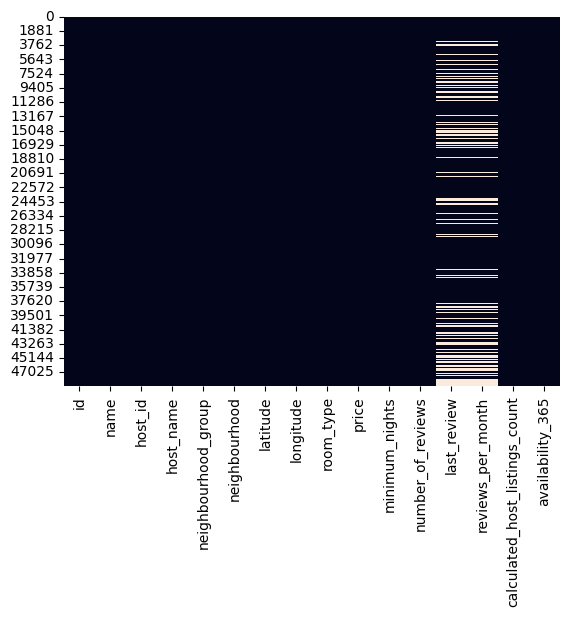

In [ ]:
#visualization of missing dataset
sns.heatmap(df.isnull(),cbar=False)

<font size='3'>White lines show the missing element of the dataset

<font size='5'>**Exploring columns of the dataset**</font>

<font size='3'>**1.id  :  listing Id**</font>

In [ ]:
df['id']

0            2539
1            2595
2            3647
3            3831
4            5022
           ...   
48890    36484665
48891    36485057
48892    36485431
48893    36485609
48894    36487245
Name: id, Length: 48895, dtype: int64

<font size='3'>**2.name  :  name of listing**</font>

In [ ]:
df['name']

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                          Cozy Entire Floor of Brownstone
4         Entire Apt: Spacious Studio/Loft by central park
                               ...                        
48890      Charming one bedroom - newly renovated rowhouse
48891        Affordable room in Bushwick/East Williamsburg
48892              Sunny Studio at Historical Neighborhood
48893                 43rd St. Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 48895, dtype: object

<font size='3'>**3.host_id  :  host ID**</font>

In [ ]:
df['host_id']

0            2787
1            2845
2            4632
3            4869
4            7192
           ...   
48890     8232441
48891     6570630
48892    23492952
48893    30985759
48894    68119814
Name: host_id, Length: 48895, dtype: int64

<font size='3'>**4.host_name  :  name of the host**</font>

In [ ]:
df['host_name']

0                 John
1             Jennifer
2            Elisabeth
3          LisaRoxanne
4                Laura
             ...      
48890          Sabrina
48891          Marisol
48892    Ilgar & Aysel
48893              Taz
48894       Christophe
Name: host_name, Length: 48895, dtype: object

<font size='3'>**5.neighbourhood_group  :  location**</font>

In [ ]:
df['neighbourhood_group']

0         Brooklyn
1        Manhattan
2        Manhattan
3         Brooklyn
4        Manhattan
           ...    
48890     Brooklyn
48891     Brooklyn
48892    Manhattan
48893    Manhattan
48894    Manhattan
Name: neighbourhood_group, Length: 48895, dtype: object

In [ ]:
#value count of element of neighbourhood_group
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

<font size='3'>Manhattan has  highest evaluation in the dataset.</font>

<font size='3'>**6.neighbourhood  :  area**</font>

In [ ]:
df['neighbourhood']

0                Kensington
1                   Midtown
2                    Harlem
3              Clinton Hill
4               East Harlem
                ...        
48890    Bedford-Stuyvesant
48891              Bushwick
48892                Harlem
48893        Hell's Kitchen
48894        Hell's Kitchen
Name: neighbourhood, Length: 48895, dtype: object

In [ ]:
#value count of element of neighbourhood
df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

<font size='3'>Williamsburg has highest evaluation in the dataset</font>

<font size='3'>**7.latitude  :  latitude coordinates**</font>

In [ ]:
df['latitude']

0        40.64749
1        40.75362
2        40.80902
3        40.68514
4        40.79851
           ...   
48890    40.67853
48891    40.70184
48892    40.81475
48893    40.75751
48894    40.76404
Name: latitude, Length: 48895, dtype: float64

<font size='3'>**8.longitude  :  longitude coordinates**</font>

In [ ]:
df['longitude']

0       -73.97237
1       -73.98377
2       -73.94190
3       -73.95976
4       -73.94399
           ...   
48890   -73.94995
48891   -73.93317
48892   -73.94867
48893   -73.99112
48894   -73.98933
Name: longitude, Length: 48895, dtype: float64

<font size='3'>**9.room_type  :  listing space type**</font>

In [ ]:
df['room_type']

0           Private room
1        Entire home/apt
2           Private room
3        Entire home/apt
4        Entire home/apt
              ...       
48890       Private room
48891       Private room
48892    Entire home/apt
48893        Shared room
48894       Private room
Name: room_type, Length: 48895, dtype: object

In [ ]:
#value count of element of room_type
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

<font size='3'>**10.minimum_nights  :  minimum nights spend**</font>

In [ ]:
df['minimum_nights']

0         1
1         1
2         3
3         1
4        10
         ..
48890     2
48891     4
48892    10
48893     1
48894     7
Name: minimum_nights, Length: 48895, dtype: int64

In [ ]:
#value count of element of minimum_nights
df['minimum_nights'].value_counts()

1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
186        1
366        1
68         1
87         1
36         1
Name: minimum_nights, Length: 109, dtype: int64

<font size='3'>**11.price  :  price in dollars**</font>

In [ ]:
df['price']

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [ ]:
#value count of element of price
df['price'].value_counts()

100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: price, Length: 674, dtype: int64

<Axes: >

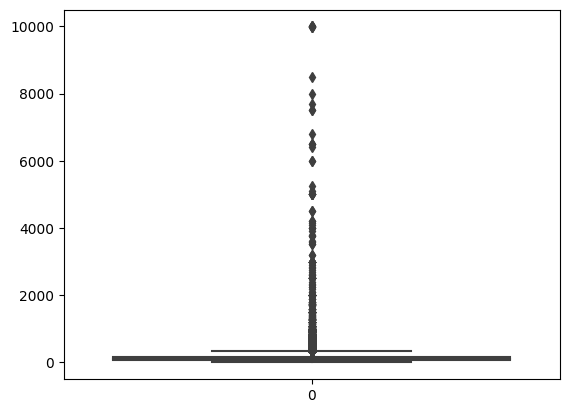

In [ ]:
sns.boxplot(df['price'])

Since price column has too many outliers so we have remove those outliers as it cause effect to our dataset.

<Axes: xlabel='price', ylabel='Count'>

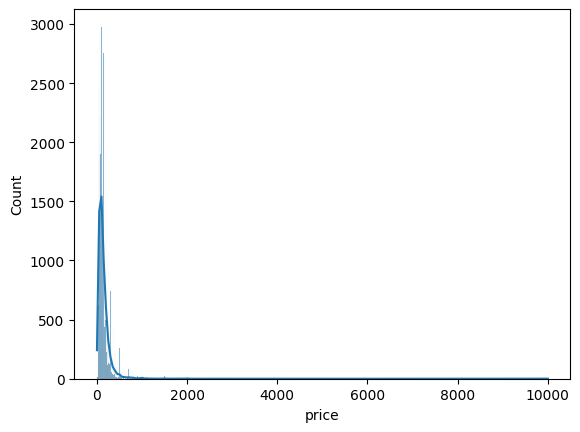

In [ ]:
sns.histplot(df['price'],kde=True)

In [ ]:
df.agg({'price':['mean','median','min','max']})

,price
mean,152.720687
median,106.000000
min,0.000000
max,10000.000000


From the above histogram it is shown that graph is highly right skewed.To have effective observation it is necessary to have normal/gaussian distribution.

In [ ]:
def remove_outliers(p):
  q1,q3=np.percentile(df['price'],[25,90])

  if p>q1 and p<q3:
    k=p
  else:
    k=np.nan

  return k

df['price']=df['price'].apply(remove_outliers)

In [ ]:
df.dropna(subset=['price'],inplace=True)

<Axes: xlabel='price', ylabel='Count'>

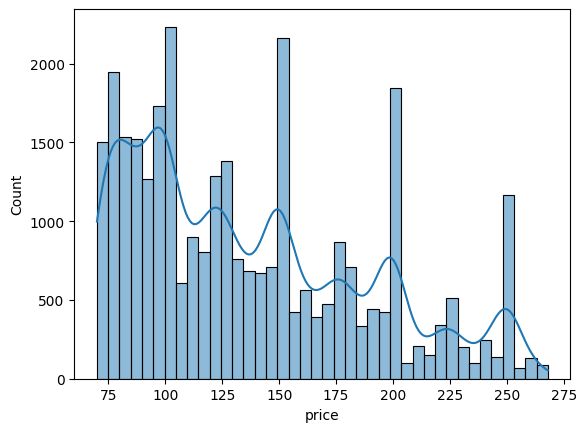

In [ ]:
sns.histplot(df['price'],kde=True)

In [ ]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

df.agg({'price':['mean','median','max','min']})

,price
mean,136.294373
median,125.000000
max,268.000000
min,70.000000


<Axes: >

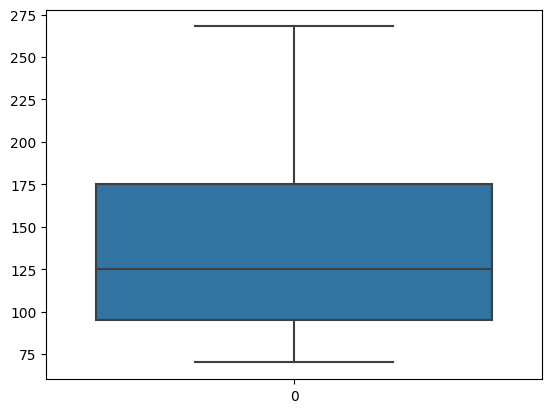

In [ ]:
sns.boxplot(df['price'])

All the outliers has been remove from the dataset

<font size='3'>**12.number_of_reviews  :  number of reviews**</font>

In [ ]:
df['number_of_reviews']

0          9
1         45
2          0
3        270
4          9
        ... 
48887      0
48888      0
48890      0
48892      0
48894      0
Name: number_of_reviews, Length: 31613, dtype: int64

<font size='3'>**13.last_review  :  latest review**</font>

In [ ]:
df['last_review']

0        2018-10-19
1        2019-05-21
2               NaN
3        2019-07-05
4        2018-11-19
            ...    
48887           NaN
48888           NaN
48890           NaN
48892           NaN
48894           NaN
Name: last_review, Length: 31613, dtype: object

<font size='3'>**14.reviews_per_month  :  number of reviews per month**</font>

In [ ]:
df['reviews_per_month']

0        0.21
1        0.38
2         NaN
3        4.64
4        0.10
         ... 
48887     NaN
48888     NaN
48890     NaN
48892     NaN
48894     NaN
Name: reviews_per_month, Length: 31613, dtype: float64

<font size='3'>**15.calculated_host_listing_count  :  amount of listings per host**</font>

In [ ]:
df['calculated_host_listings_count']

0        6
1        2
2        1
3        1
4        1
        ..
48887    3
48888    1
48890    2
48892    1
48894    1
Name: calculated_host_listings_count, Length: 31613, dtype: int64

<font size='3'>**16.availability_365  :number of days when listing is available for booking**</font>

In [ ]:
df['availability_365']

0        365
1        355
2        365
3        194
4          0
        ... 
48887    365
48888     31
48890      9
48892     27
48894     23
Name: availability_365, Length: 31613, dtype: int64

<font size='10'>**Data Wrangling**</font>

<font size='3'>As we have seen above that tere are some null and missing values in the dataset,so we have to clean the dataset fo predictive analysis.<br>
<br>
1.Remove NaN values from data.<br>
2.Replace all missing values with 0.<br>
3.Dropping columns yhat are not required.<br>

In [ ]:
#Filling values of name and host_name columns
df['name'].fillna('Not mention',inplace=True)
df['host_name'].fillna('Not mention',inplace=True)

In [ ]:
#drop unnecessary columns
df=df.drop(['last_review','reviews_per_month'],axis=1)

<Axes: >

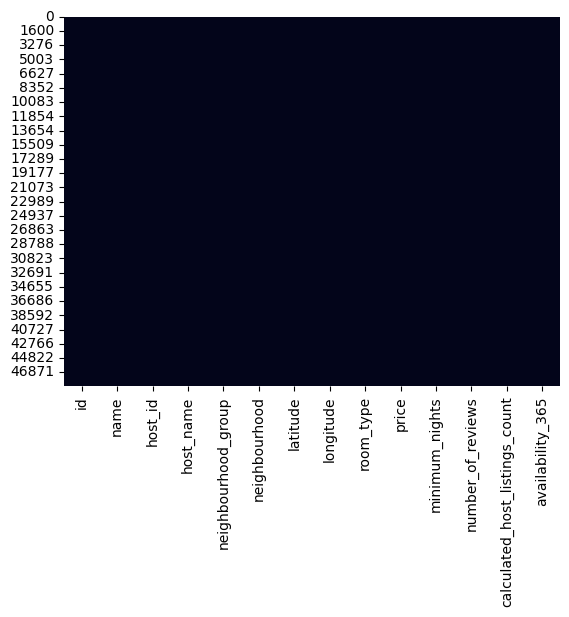

In [ ]:
#checking missing element
sns.heatmap(df.isnull(),cbar=False)

<font size='3'>**Output of manipulation:**<br>
1.Fill name and host_name with "Not mention" as these are string and can't fill with mean or median of the string.
<br>2.Two columns are of not so much of use so they are simply drop

<font size='10'>**Exploratory Data Analysis**</font>

<font size='3'>Understanding relationship between variable</font>

<font size='5'>**Univariate Analysis**</font><br>


<font size='5'>**Chart 1:**What is overall distribution of neighbourhood group in dataset?</font>

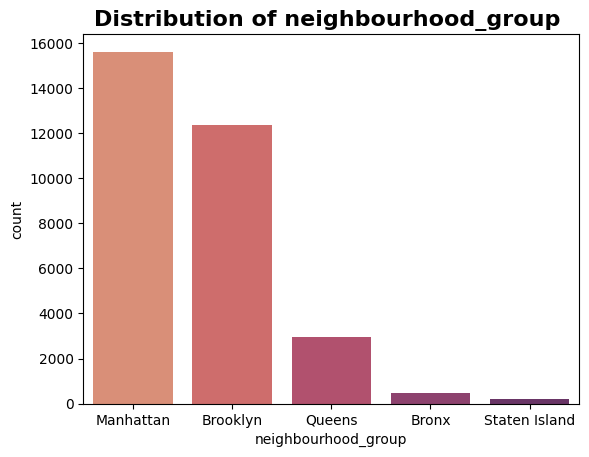

In [ ]:
k=df['neighbourhood_group'].value_counts()
plt.title('Distribution of neighbourhood_group ',weight='bold',fontsize=16)
sns.countplot(data=df,x='neighbourhood_group',palette='flare',order=k.index)
plt.show()

<font size='3'>1.Why did you pick the specific chart?<br>
Bar chart is showing the total/overall distribution of types of neighbourhood_group listed in our Airbnb dataset.<br>
<br>
2.What is/are the insight(s)found from the chart?<br>
 Manhattan is the highest evaluation of dataset.<br>
<br>
3.Will the gained insights help creating a business impact?Are there any insights that lead to negative growth?Justify with specific reason.<br>
Yes,We can clearly see that Manhattan has highest count in dataset.This will help the business to grow more in less explore area as it will create new market for business.<br>



<font size='5'>**Chart 2:**Top 20 neighbourhoods with maximum listing</font>

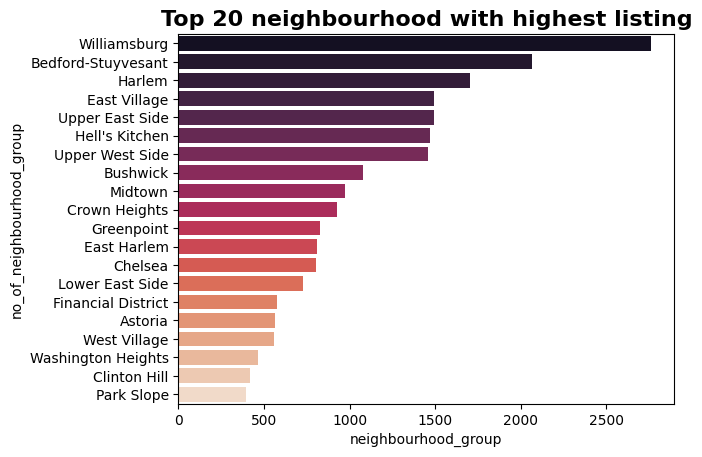

In [ ]:
plt.title('Top 20 neighbourhood with highest listing',weight='bold',fontsize=16)
plt.xlabel('neighbourhood_group')
plt.ylabel('no_of_neighbourhood_group')
k=df['neighbourhood'].value_counts()
k=k[:20]
sns.barplot(x=k.values,y=k.index,palette='rocket')
plt.show()

<font size='3'>Why did you pick the specific chart?<br>
There are more than 200 neighbours listed out,so to have glimpse of top 20 neighbours.<br>
<br>What is/are insight(s) found from this chart?<br>
Williamburg and Bedford-Stuyvesant are more popular.<br>
<br>Will the gained insights help creating a business impact?Are there any insights that lead to negative growth?Justify with specific reason.<br>



<font size='5'>**Chart 3:**What is the overall distribution of room in dataset?

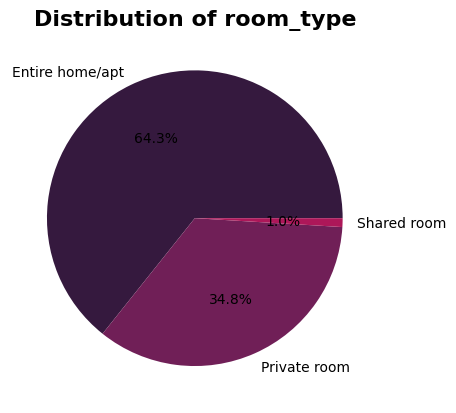

In [ ]:

room_types = df['room_type'].value_counts()
plt.title('Distribution of room_type',weight='bold',fontsize=16)
# Create a pie chart
plt.pie(room_types, labels=room_types.index, colors=sns.color_palette('rocket'), autopct='%1.1f%%')

plt.show()


<font size='3'>Why did you pick the specific chart?<br>
Pie chart is dividing a whole in different part ie there are 3 type of room .It help in show the percentage each part contain.<br>
<br>What is/are insight(s) found from this chart?<br>
Entire home /apt has highest share of the three<br>
<br>Will the gained insights help creating a business impact?Are there any insights that lead to negative growth?Justify with specific reason.<br>

<font size='5'>**Chart 4 :**What is avg minimum nights in the neighbourhood_group?

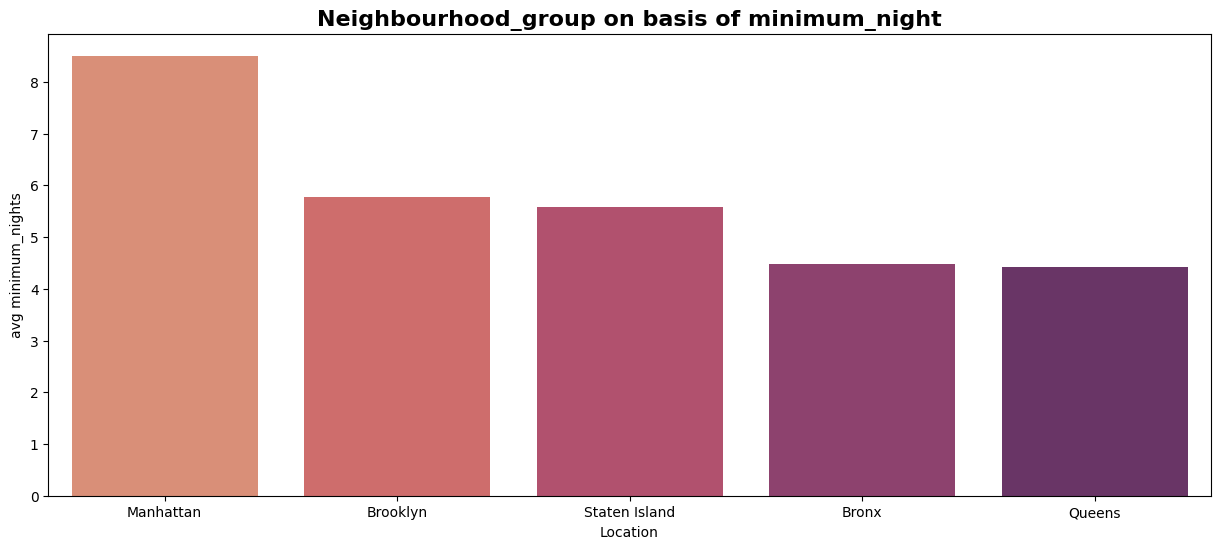

In [ ]:
#neighbourhood_group on basis of minimum_night
k=df.groupby('neighbourhood_group')['minimum_nights'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,6))
plt.title('Neighbourhood_group on basis of minimum_night',weight='bold',fontsize=16)

sns.barplot(x=k.index,y=k.values,palette='flare')
plt.xlabel('Location')
plt.ylabel('avg minimum_nights')
plt.show()

<font size='3'>Why did you pick the specific chart?<br>

Bar chart is showing the total/overall distribution of types of neighbourhood_group listed in our Airbnb dataset.<br>
<br>What is/are insight(s) found from this chart?<br>
Manhattan has highest no of minimum night ie 8+days.<br>
<br>Will the gained insights help creating a business impact?Are there any insights that lead to negative growth?Justify with specific reason.<br>
Yes, it help in creating business impact as it help Airbnb to more focus on Manhattan as there are more no of avg stay as compare to other neighbour.It mean that room are book for more no of days in Manhattan leads to more revenue.

<font size='5'>**Chart 5 :**What is avg minimum nights according to room_type?

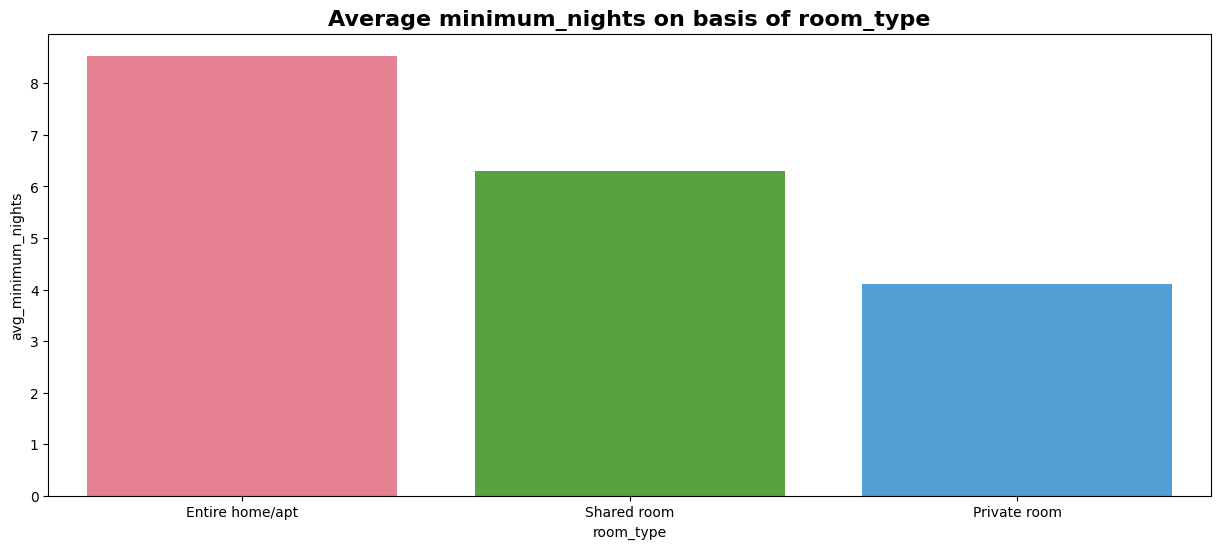

In [ ]:
#room_type on basis of minimum_night
k=df.groupby('room_type')['minimum_nights'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,6))
plt.title('Average minimum_nights on basis of room_type',weight='bold',fontsize=16)
plt.xlabel('Room_type')
plt.ylabel('avg_minimum_nights')

sns.barplot(x=k.index,y=k.values,palette='husl')
plt.show()

<font size='3'>Why did you pick the specific chart?<br>

Bar chart is showing the total/overall distribution of types of neighbourhood_group listed in our Airbnb dataset.<br>
<br>What is/are insight(s) found from this chart?<br>
Entire home/apt has highest no of minimum night ie 8+days.<br>
<br>Will the gained insights help creating a business impact?Are there any insights that lead to negative growth?Justify with specific reason.<br>
Yes, it help in creating business impact as it help Airbnb to more focus on entire home/apt as there are more no of avg stay as compare to other room_type.It mean that room are book for more no of days in entire home/apt leads to more revenue.

<font size='5'>**Chart 6:**What is avg preferd price by customer on basis of location?

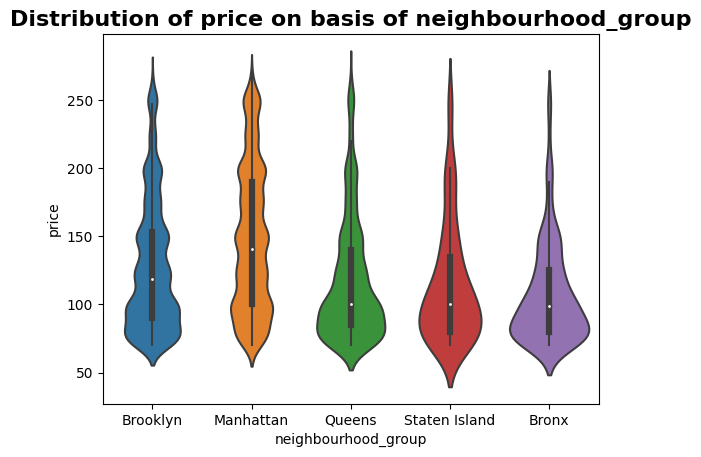

In [ ]:
plt.title('Distribution of price on basis of neighbourhood_group',weight='bold',fontsize=16)
plt.xlabel('neighbourhood_group')
plt.ylabel('price')
sns.violinplot(data=df,y='price',x='neighbourhood_group')
plt.show()

<font size='3'>Why did you pick the specific chart?<br>
A violin graph is a hybrid of box and kernel density plot which show peak in data.It is used to visualize the distribution of numerical data.<br>

<br>What is/are insight(s) found from this chart?<br>
Price of each of neighbourhood  is mostly in range 70 to 150.Above 150,it is low in density.<br>
<br>Will the gained insights help creating a business impact?Are there any insights that lead to negative growth?Justify with specific reason.<br>
There is more no of booking for Airbnb whose price range between 70 to 150.So in future, Airbnb price to be in range 70 to 150

<font size='5'>**Chart 7:**What is avg preferd price by customer on basis of room_type?

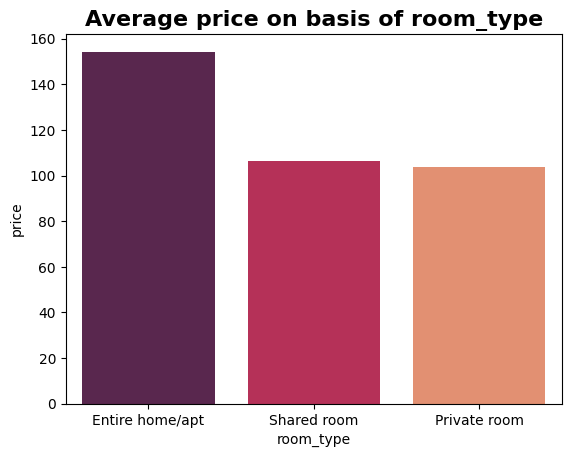

In [ ]:
# avg price on basis of room_type
pr=df.groupby('room_type')['price'].mean().sort_values(ascending=False)
plt.title('Average price on basis of room_type',weight='bold',fontsize=16)
plt.xlabel('room_type')
plt.ylabel('price')
sns.barplot(x=pr.index,y=pr.values,palette='rocket')
plt.show()

<font size='3'>Why did you pick the specific chart?<br>
Bar chart is use to show relationship between average of price v/s room_type.<br>
<br>What is/are insight(s) found from this chart?<br>
Price of enture home/apt is 150 while that of shared room and private room is 100.<br>
<br>Will the gained insights help creating a business impact?Are there any insights that lead to negative growth?Justify with specific reason.<br>
There is high demand of entire home/apt so the price of these are high.Joint family or group of friend usually prefer home as perr person cost for them would be less as compare to share or private room.

<font size='5'>**Chart 8:**Which of neighbourhood_group has highest no of reviews?</font>

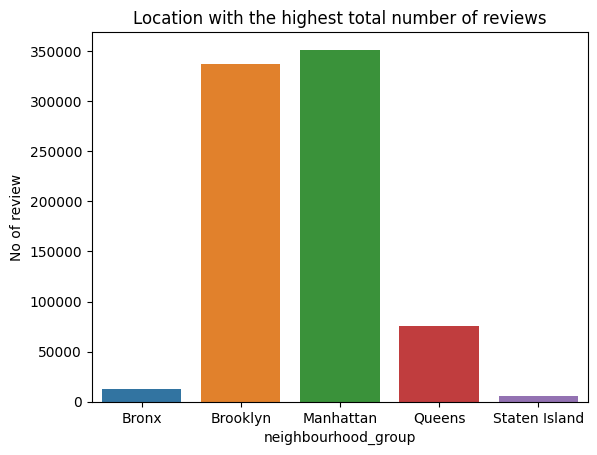

In [ ]:
# Identify the neighbourhood with the highest total number of reviews
plt.xlabel('Location')
plt.ylabel('No of review')
plt.title('Location with the highest total number of reviews')
ng=df.groupby('neighbourhood_group')['number_of_reviews'].sum()
sns.barplot(x=ng.index,y=ng.values)
plt.show()

<font size='3'>Why did you pick the specific chart?<br>

<br>What is/are insight(s) found from this chart?<br>
Manhattan and Brookly  
<br>Will the gained insights help creating a business impact?Are there any insights that lead to negative growth?Justify with specific reason.<br>

<font size='5'>**Chart 9:**Latitude and longitude distribution of neighbourhood_group</font>

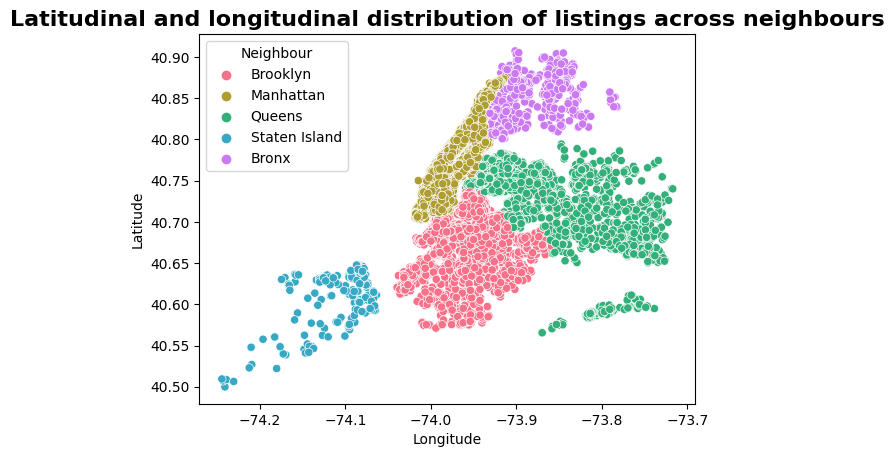

In [ ]:
lat = sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['neighbourhood_group'], palette="husl")

lat.set_title('Latitudinal and longitudinal distribution of listings across neighbours', weight='bold', fontsize = 16)
lat.set_xlabel('Longitude')
lat.set_ylabel('Latitude')
lat.legend(loc='upper left', title='Neighbour')
plt.show()

<font size='3'>Why did you pick the specific chart?<br>
Scatter plot is use to show the distribution of longitude and latitude and help in specify the location of different neighbour  in graph.
<br>What is/are insight(s) found from this chart?<br>
Most of the Airbnb lie in -74to-73.9 longitude ie Manhattan and Brooklyn.


<font size='5'>**Chart 10:**Latitude and longitude distribution on basis of room_type</font>

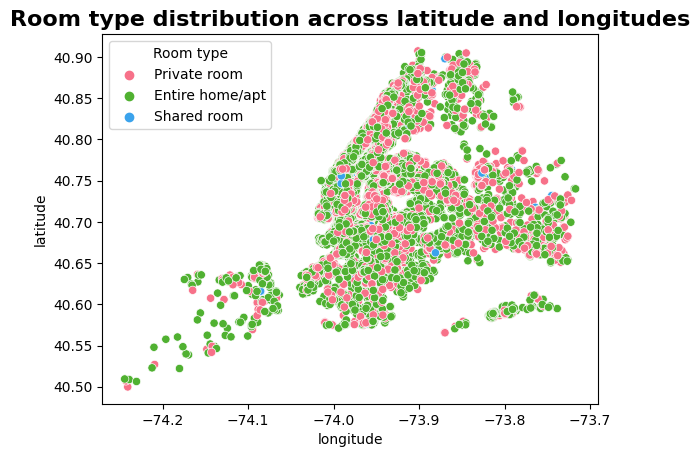

In [ ]:
rm = sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.room_type, palette="husl")
rm.set_title('Room type distribution across latitude and longitudes', weight='bold', fontsize = 16)
rm.legend(loc='upper left', title='Room type')
plt.show()

<font size='3'>

<br>What is/are insight(s) found from this chart?<br>
Entire scatterplot is wih green color ie entire home/apt are more in no then private or share room.<br>


<font size='5'>**Chart 11:**Latitude and longitude distribution on basis of price</font>

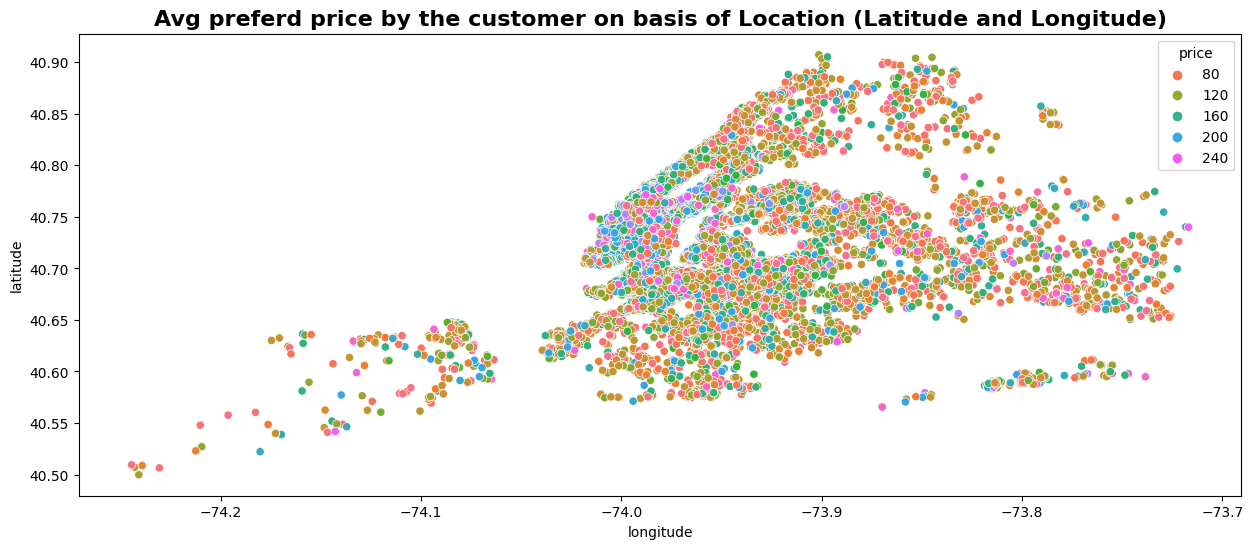

In [ ]:
#avg price on basis of neighbourhood_group
plt.figure(figsize=(15,6))
plt.title('Avg preferd price by the customer on basis of Location (Latitude and Longitude)',weight='bold',fontsize=16)
plt.ylabel('latitude')
sns.scatterplot(data=df,x='longitude',y='latitude',hue='price',palette='husl')
plt.show()

<font size='5'>**Chart 12:**Visualizing Availability by neighbourhood_group</font>

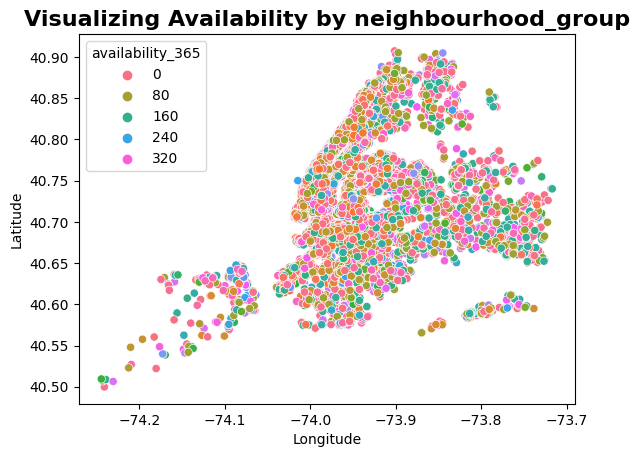

In [ ]:
#Calculate room availability  within each neighbourhood group
df.groupby(['neighbourhood_group'])['availability_365'].mean()
lat = sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.availability_365, palette="husl")
lat.set_title('Visualizing Availability by neighbourhood_group', weight='bold', fontsize = 16)
lat.set_xlabel('Longitude')
lat.set_ylabel('Latitude')
lat.legend(loc='upper left', title='availability_365')

<font size='5'>**Chart 13:**Corelation between differnt feature of dataset.</font>

<ipython-input-60-3621cd098870>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),annot=True)


<Axes: >

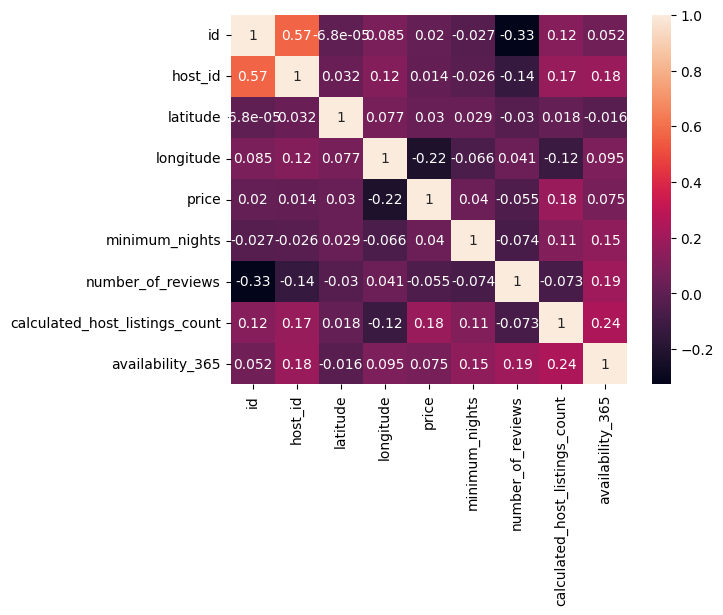

In [ ]:
#corelation  between differnt column of dataset
sns.heatmap(data=df.corr(),annot=True)

<font size='3'>Why did you pick the specific chart?<br>
Heat map is use to find corelation between all feature of dataset.<br>




<font size='5'> Manhattan is targetted area . We have to further study to get business perspective.

<font size='5'>**Chart 14:**Distribution of room_type in Manhattan</font>

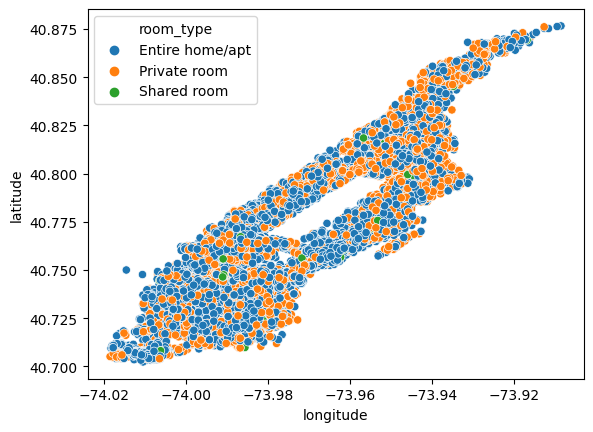

In [ ]:
df1=df[df['neighbourhood_group']=='Manhattan']# df1 is new dataframe which has only Manhattan as a neighbourhood_group
sns.scatterplot(data=df1,x='longitude',y='latitude',hue='room_type')
plt.show()

<font size='3'>Why did you pick the specific chart?<br>
Scatter plot is use to express the spread of latitude and longitude of Manhattan.<br>
<br>What is/are insight(s) found from this chart?<br>
From the above graph,it is shown that entire home/apt are uniformly spread in Manhattan and shared room are too less in number.There are more private room between -73.92 to -73.94 longitude as compare to rest of the region.<br>


<font size='5'>**Chart 15:**Distribution of Airbnb in Manhattan</font>

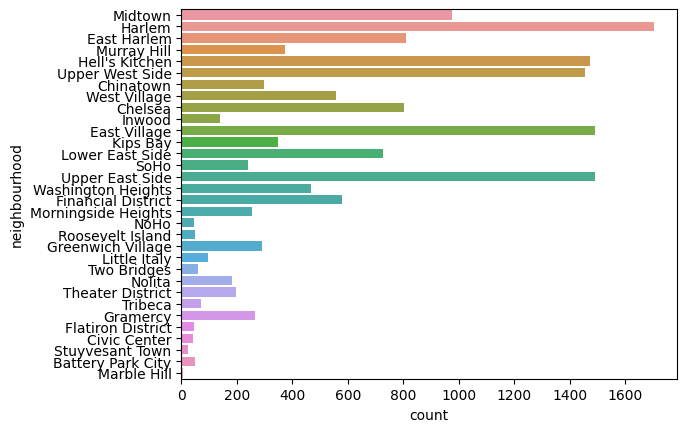

In [ ]:
#neighbourhood area
sns.countplot(data=df1,y='neighbourhood')
plt.show()

<font size='3'>Why did you pick the specific chart?<br>
Bar chart is use to compare distribution of Airbnb in Manhattan.<br>
<br>What is/are insight(s) found from this chart?<br>
Harlem has highest no of Airbnb while Marble Hill has least.<br>
<br>Will the gained insights help creating a business impact?Are there any insights that lead to negative growth?Justify with specific reason.<br>
There should be more attention given to Hell Kitchen,Upper West Side

<font size='5'>**Chart 16:**Price range distribution on basis of room_type in Manhattan.</font>

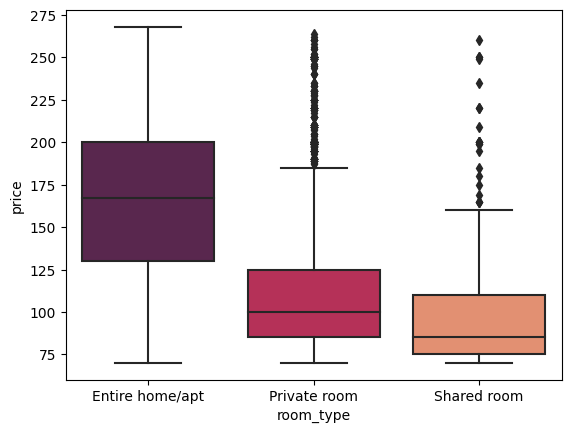

In [ ]:
#price distribution in Manhatttan on basis of room_type
sns.boxplot(data=df1,x='room_type',y='price',palette='rocket')
plt.show()

<font size='3'>Why did you pick the specific chart?<br>
Box plot is use to show the price range in room_type of Manhattan.<br>

<br>What is/are insight(s) found from this chart?<br>
Entire home/apt has price range 125 to 250 while shared room has price range of 75 to 125.<br>
<br>Will the gained insights help creating a business impact?Are there any insights that lead to negative growth?Justify with specific reason.<br>
Even though price of entire home/apt is much high than share room but alse people prefer it as it give them personal space and in case of joint family person person cost has also less.So its advice to have entire home/apt more in number.

<font size='5'>**Chart 17:**Minimum night spend in neighbourhood of Manhattan</font>

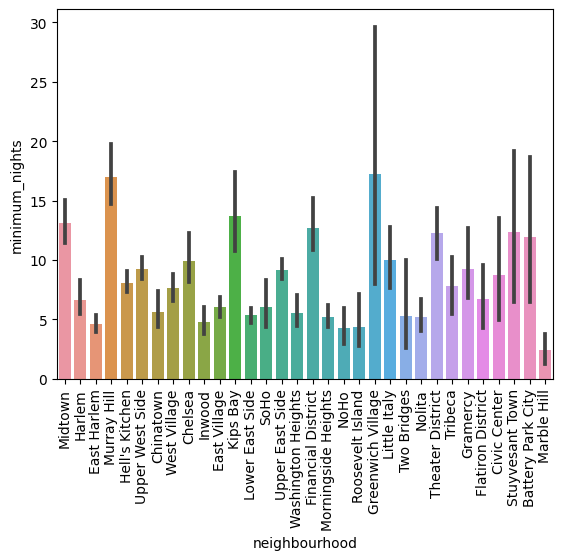

In [ ]:
#Calculate the average minimum nights spent by summing the duration of each booking in each location of Manhattan
df1.groupby('neighbourhood')['minimum_nights'].mean()
plt.xticks(rotation=90)
k=sns.barplot(data=df1,y='minimum_nights',x='neighbourhood')


<font size='3'>Why did you pick the specific chart?<br>
Bar chart is use to compare numerical value of average minimum night in neighbourhood of Manhattan.<br>
<br>What is/are insight(s) found from this chart?<br>
Murray Hill has highest minimum nights while Marble hill has lowest minimum nights.Harlem has highest no of Airbnb but minimum night stay is approx 7. <br>

<br>Will the gained insights help creating a business impact?Are there any insights that lead to negative growth?Justify with specific reason.<br>
In Mahanttan,occupancy of Airbnb is not uniformly distributed ie.some place occupancy is as high as 17 minimum nights while some has occupancy as low as 2 minimum nights.

#Conclusion</br>
The exploratory data analysis (EDA) on Airbnb bookings provides valuable insights that can contribute to business growth and strategic decision-making. Here are some potential business growth opportunities based on the findings:
</br>
</br>
**Optimizing Property Listings:**

Identify the most common types of properties listed by hosts on Airbnb.
Use this information to optimize the platform by promoting or featuring popular property types.
Provide incentives or guidance for hosts to list properties that align with the most common preferences.</br></br>
**Strategic Area Expansion:**

Determine which neighborhoods or areas attract the highest number of bookings and guest interest.
Consider strategic expansion plans or marketing campaigns in these high-demand areas.
Collaborate with hosts in popular neighborhoods to enhance the overall Airbnb experience in those locations.</br></br>
**Leveraging High-Traffic Areas:**

Analyze areas with the maximum traffic to understand their popularity.
Strategically leverage these high-traffic areas for targeted marketing campaigns and business growth.
Consider partnerships or promotions to attract more guests to these locations.</br></br>
**Optimizing Pricing Strategies:**

Determine the ideal pricing range for different room types and locations based on customer preferences.
Implement dynamic pricing strategies that align with market demand and customer expectations.
Provide recommendations or tools for hosts to optimize their pricing for better competitiveness.</br>
</br>
**Recognizing Top-Performing Hosts:**

Identify hosts whose properties receive the most reviews and positive ratings.
Develop a recognition program or provide extra benefits to top-performing hosts to encourage their continued success.
Showcase these hosts on the platform to build trust and attract more guests.</br>
</br>
**Improving User Experience:**

Consider user experience enhancements based on geographical distribution and property types.
Implement features that cater to the preferences of users in specific areas or those looking for particular property types.
Continuously gather user feedback to make informed platform improvements.
Market Expansion and Diversification:

Explore opportunities for market expansion into new neighborhoods or regions.
Diversify property offerings to cater to a broader range of traveler preferences.
Consider entering untapped markets or regions with growth potential.</br>
</br>
**Data-Driven Decision-Making:**

Encourage data-driven decision-making within the company based on the EDA findings.
Incorporate insights into strategic planning sessions to align business goals with market trends.
Continuously monitor and analyze data for adaptive strategies in a dynamic market.